# Analysis of Algorithms

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Appendix A

Copyright 2017 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import os
import string
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import thinkplot

import matplotlib.pyplot as plt

### Empirical order of growth

Sometimes we can figure out what order of growth a function belongs to by running it with a range of problem sizes and measuring the run time.

To measure runtimes, we'll use `etime`, which uses `os.times` to compute the total time used by a process, including "user time" and "system time".  User time is time spent running your code; system time is time spent running operating system code on your behalf.

In [2]:
def etime():
    """Measures user and system time this process has used.

    Returns the sum of user and system time."""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

`time_func` takes a function object and a problem size, `n`, runs the function, and returns the elapsed time.

In [3]:
def time_func(func, n):
    """Run a function and return the elapsed time.
    
    func: function
    n: problem size
    
    returns: user+sys time in seconds
    """
    start = etime()
    func(n)
    end = etime()
    elapsed = end - start
    return elapsed

Here's an example: a function that makes a list with the given length using `append`.

In [4]:
def append_list(n):
    t = []
    for i in range(n):
        t.append(i)
    return t

time_func(append_list, 1000000)

0.15000000000000013

`run_timing_test` takes a function, runs it with a range of problem sizes, and returns two lists: problem sizes and times.

In [5]:
def run_timing_test(func, max_time=1):
    """Tests the given function with a range of values for n.
    
    func: function object

    returns: list of ns and a list of run times.
    """
    ns = []
    ts = []
    for i in range(10, 28):
        n = 2**i
        t = time_func(func, n)
        print(n, t)
        if t > 0:
            ns.append(n)
            ts.append(t)
        if t > max_time:
            break

    return ns, ts

Here's an example with `append_list`

In [6]:
ns, ts = run_timing_test(append_list)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.009999999999999787
32768 0.010000000000000009
65536 0.010000000000000009
131072 0.030000000000000027
262144 0.040000000000000036
524288 0.07000000000000006
1048576 0.10000000000000009
2097152 0.20999999999999996
4194304 0.3999999999999999
8388608 0.79
16777216 1.56


`fit` takes the lists of ns and ts and fits it with a curve of the form `a * n**exp`, where `exp` is a given exponent and `a` is chosen so that the line goes through a particular point in the sequence, usually the last. 

In [7]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.
    
    ns: sequence of problem sizes
    ts: sequence of times
    exp: exponent of the fitted curve
    index: index of the element the fitted line should go through
    
    returns: sequence of fitted times

    
    """
    # Use the element with the given index as a reference point, 
    # and scale all other points accordingly.
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = n / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

`plot_timing_test` plots the results.

In [8]:
def plot_timing_test(ns, ts, label='', color='blue', exp=1.0, scale='log'):
    """Plots data and a fitted curve.

    ns: sequence of n (problem size)
    ts: sequence of t (run time)
    label: string label for the data curve
    color: string color for the data curve
    exp: exponent (slope) for the fitted curve
    """
    tfit = fit(ns, ts, exp)
    plt.plot(ns, tfit, color='0.7', linewidth=2, linestyle='dashed')
    plt.plot(ns, ts, 's-', label=label, color=color, alpha=0.5, linewidth=3)
    plt.xlabel('Problem size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

Here are the results from `append_list`.  When we plot `ts` versus `ns` on a log-log scale, we should get a straight line.  If the order of growth is linear, the slope of the line should be 1. 

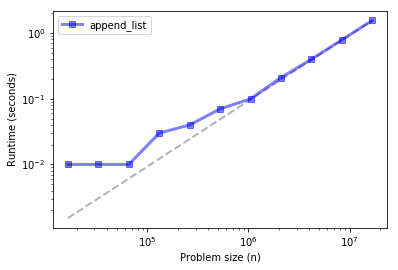

In [9]:
plot_timing_test(ns, ts, 'append_list', exp=1)

For small values of `n`, the runtime is so short that we're probably not getting an accurate measurement of just the operation we're interested in.  But as `n` increases, runtime seems to converge to a line with slope 1.  

That suggests that performing append `n` times is linear, which suggests that a single append is constant time.  

### list.pop

Now let's try that with `pop`, and specifically with `pop(0)`, which pops from the left side of the list.

1024 0.0
2048 0.0
4096 0.0
8192 0.019999999999999574
16384 0.040000000000000036
32768 0.14000000000000057
65536 0.54
131072 2.210000000000001


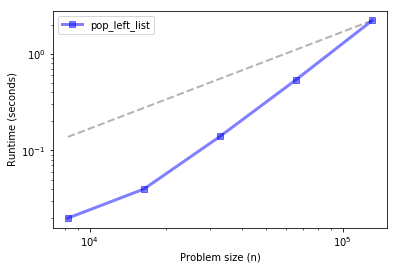

In [10]:
def pop_left_list(n):
    t= []
    for i in range(n):
        t.append(i)
    for _ in range(n):
        t.pop(0)
    return t

ns, ts = run_timing_test(pop_left_list)
plot_timing_test(ns, ts, 'pop_left_list', exp=1)

That doesn't look very good.  The runtimes increase more steeply than the line with slope 1.  Let's try slope 2.

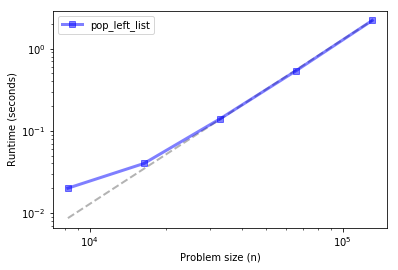

In [11]:
plot_timing_test(ns, ts, 'pop_left_list', exp=2)

The last few points converge on the line with slope 2, which suggests that `pop(0)` is quadratic.

**Exercise:**  What happens if you pop from the end of the list?  Write a function called `pop_right_list` that pops the last element instead of the first.

1024 0.009999999999999787
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000001563
32768 0.009999999999999787
65536 0.019999999999999574
131072 0.03999999999999915
262144 0.0600000000000005
524288 0.14000000000000057
1048576 0.25
2097152 0.5399999999999991
4194304 1.0299999999999994


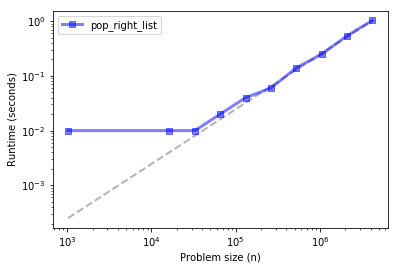

In [12]:
# Solution

def pop_right_list(n):
    t= []
    for i in range(n):
        t.append(i)
    for _ in range(n):
        t.pop(-1)
    return t

ns, ts = run_timing_test(pop_right_list)
plot_timing_test(ns, ts, 'pop_right_list', exp=1)

### Sorting

We expect sorting to be `n log n`.  On a log-log scale, that doesn't look like a straight line, so there's no simple test whether it's really `n log n`.  Nevertheless, we can plot results for sorting lists with different lengths, and see what it looks like.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.009999999999999787
131072 0.009999999999999787
262144 0.030000000000001137
524288 0.03999999999999915
1048576 0.08000000000000007
2097152 0.16999999999999993
4194304 0.3500000000000014
8388608 0.7399999999999984
16777216 1.5300000000000011


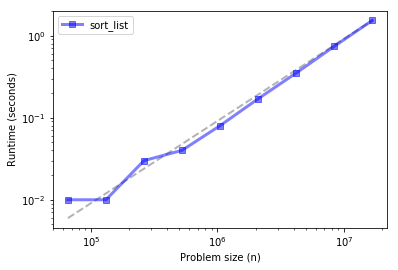

In [13]:
def sort_list(n):
    t = np.random.random(n)
    t.sort()
    return t

ns, ts = run_timing_test(sort_list)
plot_timing_test(ns, ts, 'sort_list', exp=1)

It sure looks like sorting is linear, so that's surprising.  But remember that `log n` changes much more slowly than `n`.  Over a wide range of values, `n log n` can be hard to distinguish from an algorithm with linear growth.  As `n` gets bigger, we would expect this curve to be steeper than slope 1.  But often, for practical problem sizes, `n log n` is as good as linear.

### Bisection search

We expect bisection search to be `log n`, which is so fast it is hard to measure the way we've been doing it.

To make it work, I create the sorted list ahead of time and use the parameter `hi` to specify which part of the list to search.  Also, I have to run each search 100,000 times so it takes long enough to measure. 

1024 0.12999999999999545
2048 0.15000000000000568
4096 0.1599999999999966
8192 0.14999999999999858
16384 0.17999999999999972
32768 0.1600000000000037
65536 0.17999999999999972
131072 0.17999999999999972
262144 0.20000000000000284


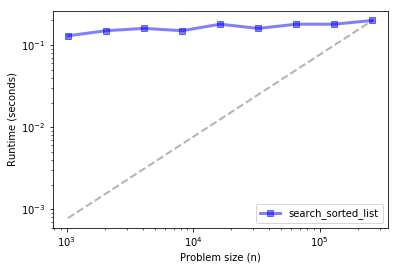

In [40]:
t = np.random.random(16777216)
t.sort()

from bisect import bisect

def search_sorted_list(n):
    for i in range(100000):
        index = bisect(t, 0.1, hi=n) 
    return index

ns, ts = run_timing_test(search_sorted_list, max_time=0.2)
plot_timing_test(ns, ts, 'search_sorted_list', exp=1)

It looks like the runtime increases slowly as `n` increases, but it's definitely not linear.  To see if it's constant time, we can compare it to the line with slope 0.

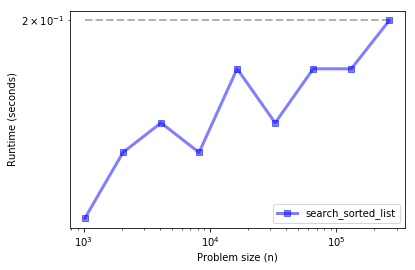

In [41]:
plot_timing_test(ns, ts, 'search_sorted_list', exp=0)

Nope, looks like it's not constant time, either.  We can't really conclude that it's `log n` based on this curve along, but the results are certainly consistent with that theory.

### Dictionary methods

**Exercise:** Write methods called `add_dict` and `lookup_dict`, based on `append_list` and `pop_left_list`.  What is the order of growth for adding and looking up elements in a dictionary?

1024 0.0
2048 0.0
4096 0.0
8192 0.009999999999999787
16384 0.0
32768 0.0
65536 0.0
131072 0.019999999999999574
262144 0.019999999999999574
524288 0.05000000000000249
1048576 0.09999999999999787
2097152 0.17999999999999972
4194304 0.33000000000000185
8388608 0.6400000000000006
16777216 1.5999999999999979


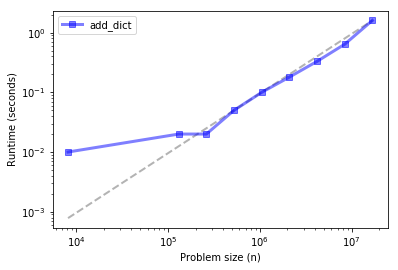

In [14]:
# Solution

def add_dict(n):
    d = {}
    for i in range(n):
        d[i] = 1
    return d

ns, ts = run_timing_test(add_dict)
plot_timing_test(ns, ts, 'add_dict', exp=1)

1024 0.0
2048 0.0
4096 0.0
8192 0.010000000000001563
16384 0.0
32768 0.00999999999999801
65536 0.010000000000001563
131072 0.029999999999997584
262144 0.060000000000002274
524288 0.09999999999999787
1048576 0.21000000000000085
2097152 0.46000000000000085
4194304 0.8299999999999983
8388608 1.6000000000000014


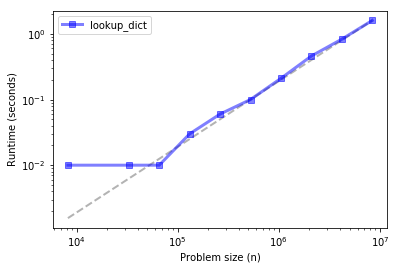

In [15]:
# Solution

def lookup_dict(n):
    d = {}
    for i in range(n):
        d[i] = 1
    total = 0
    for i in range(n):
        total += d[i]
    return d

ns, ts = run_timing_test(lookup_dict)
plot_timing_test(ns, ts, 'lookup_dict', exp=1)

In [16]:
# Solution

# Adding `n` elements to a dictionary takes linear time, so adding a single element is constant time.

# Same with looking up `n` elements.

### Implementing a hash table

The reason Python dictionaries can add and look up elements in constant time is that they are based on hash tables.  In this section, we'll implement a hash table in Python.  Remember that this example is for educational purposes only.  There is no practical reason to write a hash table like this in Python.

We'll start with a simple linear map, which is a list of key-value pairs.

In [17]:
class LinearMap(object):
    """A simple implementation of a map using a list of tuples
    where each tuple is a key-value pair."""

    def __init__(self):
        self.items = []

    def add(self, k, v):
        """Adds a new item that maps from key (k) to value (v).
        Assumes that they keys are unique."""
        self.items.append((k, v))

    def get(self, k):
        """Looks up the key (k) and returns the corresponding value,
        or raises KeyError if the key is not found."""
        for key, val in self.items:
            if key == k:
                return val
        raise KeyError

First let's make sure it works:

In [18]:
def test_map(m):
    s = string.ascii_lowercase

    for k, v in enumerate(s):
        m.add(k, v)

    for k in range(len(s)):
        print(k, m.get(k))

In [19]:
m = LinearMap()
test_map(m)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


Now let's see how long it takes to add `n` elements.

1024 0.0
2048 0.010000000000001563
4096 0.0
8192 0.0
16384 0.00999999999999801
32768 0.07000000000000028
65536 0.019999999999999574
131072 0.07000000000000028
262144 0.10999999999999943
524288 0.17999999999999972
1048576 0.39000000000000057
2097152 0.75
4194304 1.4899999999999984


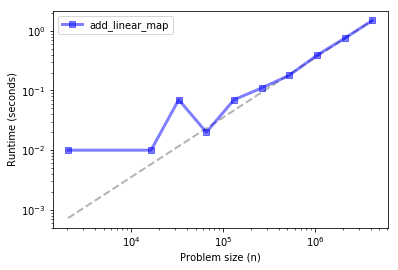

In [20]:
def add_linear_map(n):
    d = LinearMap()
    for i in range(n):
        d.add(i, 1)
    return d

ns, ts = run_timing_test(add_linear_map)
plot_timing_test(ns, ts, 'add_linear_map', exp=1)

Adding `n` elements is linear, so each add is constant time.  How about lookup?

1024 0.030000000000001137
2048 0.129999999999999
4096 0.4499999999999993
8192 1.8599999999999994


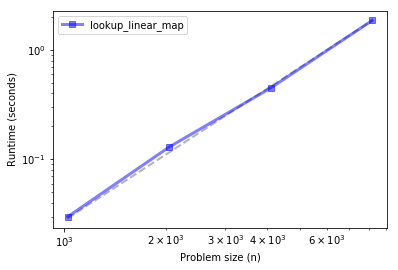

In [21]:
def lookup_linear_map(n):
    d = LinearMap()
    for i in range(n):
        d.add(i, 1)
    total = 0
    for i in range(n):
        total += d.get(i)
    return d

ns, ts = run_timing_test(lookup_linear_map)
plot_timing_test(ns, ts, 'lookup_linear_map', exp=2)

Looking up `n` elements is $O(n^2)$ (notice that `exp=2`).  So each lookup is linear.

Let's see what happens if we break the list of key-value pairs into 100 lists.

In [22]:
class BetterMap(object):
    """A faster implementation of a map using a list of LinearMaps
    and the built-in function hash() to determine which LinearMap
    to put each key into."""

    def __init__(self, n=100):
        """Appends (n) LinearMaps onto (self)."""
        self.maps = []
        for i in range(n):
            self.maps.append(LinearMap())

    def find_map(self, k):
        """Finds the right LinearMap for key (k)."""
        index = hash(k) % len(self.maps)
        return self.maps[index]

    def add(self, k, v):
        """Adds a new item to the appropriate LinearMap for key (k)."""
        m = self.find_map(k)
        m.add(k, v)

    def get(self, k):
        """Finds the right LinearMap for key (k) and looks up (k) in it."""
        m = self.find_map(k)
        return m.get(k)


In [23]:
m = BetterMap()
test_map(m)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


The run time is better (we get to a larger value of `n` before we run out of time). 

1024 0.0
2048 0.00999999999999801
4096 0.030000000000001137
8192 0.030000000000001137
16384 0.129999999999999
32768 0.41000000000000014
65536 1.6199999999999974


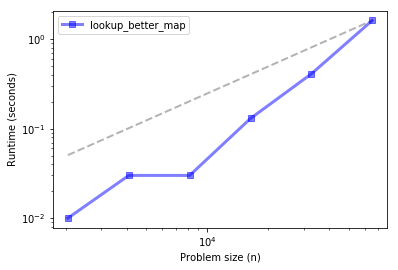

In [24]:
def lookup_better_map(n):
    d = BetterMap()
    for i in range(n):
        d.add(i, 1)
    total = 0
    for i in range(n):
        total += d.get(i)
    return d

ns, ts = run_timing_test(lookup_better_map)
plot_timing_test(ns, ts, 'lookup_better_map', exp=1)

The order of growth is hard to characterize.  It looks steeper than the line with slope 1.  Let's try slope 2.

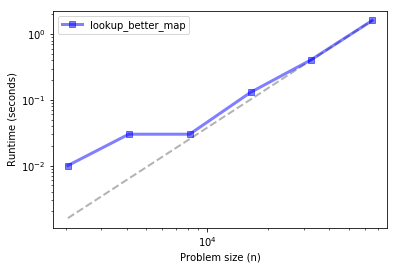

In [25]:
plot_timing_test(ns, ts, 'lookup_better_map', exp=2)

It might be converging to the line with slope 2, but it's hard to say anything conclusive without running larger problem sizes.

**Exercise:** Run `run_timing_test` with a larger value of `max_time` and see if the run time converges to the line with slope 2.

Now we're ready for a complete implementation of a hash map.

In [26]:
class HashMap(object):
    """An implementation of a hashtable using a BetterMap
    that grows so that the number of items never exceeds the number
    of LinearMaps.

    The amortized cost of add should be O(1) provided that the
    implementation of sum in resize is linear."""

    def __init__(self):
        """Starts with 2 LinearMaps and 0 items."""
        self.maps = BetterMap(2)
        self.num = 0

    def get(self, k):
        """Looks up the key (k) and returns the corresponding value,
        or raises KeyError if the key is not found."""
        return self.maps.get(k)

    def add(self, k, v):
        """Resize the map if necessary and adds the new item."""
        if self.num == len(self.maps.maps):
            self.resize()

        self.maps.add(k, v)
        self.num += 1

    def resize(self):
        """Makes a new map, twice as big, and rehashes the items."""
        new_map = BetterMap(self.num * 2)

        for m in self.maps.maps:
            for k, v in m.items:
                new_map.add(k, v)

        self.maps = new_map

In [27]:
m = HashMap()
test_map(m)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


**Exercise:** Write a function called `lookup_hash_map`, based on `lookup_better_map`, and characterize its run time.

1024 0.010000000000005116
2048 0.01999999999999602
4096 0.030000000000001137
8192 0.0799999999999983
16384 0.13000000000000256
32768 0.28000000000000114
65536 0.6000000000000014
131072 1.0599999999999952


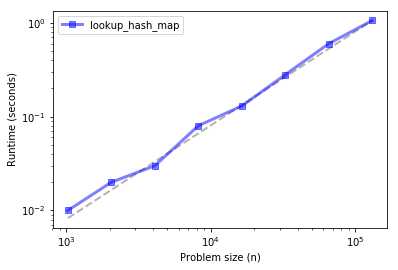

In [28]:
# Solution

def lookup_hash_map(n):
    d = HashMap()
    for i in range(n):
        d.add(i, 1)
    total = 0
    for i in range(n):
        total += d.get(i)
    return d

ns, ts = run_timing_test(lookup_hash_map)
plot_timing_test(ns, ts, 'lookup_hash_map', exp=1)

If things have gone according to plan, the results should converge to a line with slope 1.  Which means that `n` lookups is linear, which means that each lookup is constant time.  Which is pretty much magic.